## 1.导入需要的包

In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

Using TensorFlow backend.


## 2.VGG模型

In [2]:
VGG16_model = VGG16(weights='imagenet',include_top=False, input_shape=(150,150,3))

Instructions for updating:
Colocations handled automatically by placer.


## 3.修改全连接层

In [3]:
top_model = Sequential()
top_model.add(Flatten(input_shape=VGG16_model.output_shape[1:]))
top_model.add(Dense(256,activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(2,activation='softmax'))

model = Sequential()
model.add(VGG16_model)
model.add(top_model)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 4.数据集

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,width_shift_range = 0.2,height_shift_range = 0.2, rescale = 1/255,shear_range = 20,
    zoom_range = 0.2,horizontal_flip = True,fill_mode = 'nearest',) 
test_datagen = ImageDataGenerator(
    rescale = 1/255,         # 数据归一化
) 

In [5]:
batch_size = 32

# train_data
train_generator = train_datagen.flow_from_directory(
    'catVSdog/train',
    target_size=(150,150),
    batch_size=batch_size)

# test_data
test_generator = test_datagen.flow_from_directory(
    'catVSdog/test',
    target_size=(150,150),
    batch_size=batch_size )

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

## 5.训练

In [7]:
# train
model.compile(optimizer=SGD(lr=1e-4,momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit_generator(train_generator,steps_per_epoch=len(train_generator),
                    epochs=20,validation_data=test_generator,
                    validation_steps=len(test_generator))

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
13/13 [==============================] - 315s 24s/step - loss: 0.8751 - acc: 0.5262 - val_loss: 0.7611 - val_acc: 0.5000
Epoch 2/20
13/13 [==============================] - 295s 23s/step - loss: 0.7427 - acc: 0.5694 - val_loss: 0.6358 - val_acc: 0.6400
Epoch 3/20
13/13 [==============================] - 294s 23s/step - loss: 0.7166 - acc: 0.5597 - val_loss: 0.6179 - val_acc: 0.6950
Epoch 4/20
13/13 [==============================] - 295s 23s/step - loss: 0.6763 - acc: 0.6078 - val_loss: 0.6006 - val_acc: 0.6800
Epoch 5/20
13/13 [==============================] - 296s 23s/step - loss: 0.6114 - acc: 0.6588 - val_loss: 0.5651 - val_acc: 0.7300
Epoch 6/20
13/13 [==============================] - 292s 22s/step - loss: 0.6064 - acc: 0.6634 - val_loss: 0.5838 - val_acc: 0.6450
Epoch 7/20
13/13 [==============================] - 291s 22s/step - loss: 0.5769 - acc: 0.7162 - val_loss: 0.5133 - val_acc: 0.7600
Epoch 8/20
13/13 [==========

## 6.保存模型

In [8]:
model.save('model_vgg16.h5')


## 7.预测

In [24]:
from keras.models import load_model
import matplotlib.pyplot as plt
#加载模型
label = np.array(['猫','狗'])
model = load_model('model_vgg16.h5')
def pred(img):
    image = load_img(img)
    plt.imshow(image)
    image = image.resize((150,150))
    image = img_to_array(image)
    image = image/255
    image = np.expand_dims(image,0)
    image.shape
    print(label[model.predict_classes(image)])

['狗']


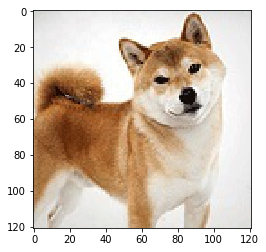

In [25]:
pred('dog.jpg')

['猫']


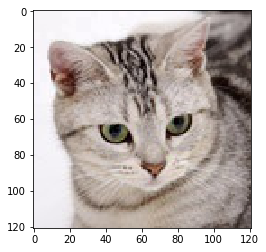

In [26]:
pred('cat.jpg')